### Import configuration and data.

In [1]:
%load_ext autoreload
%autoreload 2

from trainer import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

configfile = 'base_SNL_MSU_DOE_avg'

trainer = Trainer(device=device)
## Set params
trainer.load_config(default_configfile=configfile)
## Set datasets
trainer.load_data()

Using cpu device
{'project': 'SNL_MSU_DOE_avg', 'model': 'MLP', 'loss': 'mse', 'split_by': 'random', 'bayes_opt': False, 'patience': 500, 'epoch': 2000, 'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024, 'static_params': {'patience': 500, 'epoch': 2000}, 'chosen_params': {'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}, 'layers': [16, 64, 128, 128, 64, 16], 'n_calls': 200, 'sequence': True, 'SPACEs': {'lr': {'low': 0.001, 'high': 0.05, 'prior': 'log-uniform'}, 'weight_decay': {'low': 1e-05, 'high': 0.05, 'prior': 'log-uniform'}, 'batch_size': {'categories': [32, 64, 128, 256, 512, 1024, 2048, 4096]}}, 'feature_names_type': {'Percentage of Fibre in 0-deg Direction': 1, 'Percentage of Fibre in 45-deg Direction': 1, 'Percentage of Fibre in 90-deg Direction': 1, 'Percentage of Fibre in Other Direction': 1, 'Absolute Maximum Stress': 0, 'Absolute Peak-to-peak Stress': 0, 'Frequency': 0, 'Fibre Volumn Fraction': 1, 'Relative Maximum Stress': 0, 'Relative Peak-to-peak Stress': 0,

### Gaussian process-based Bayes hyperparameter optimization (Optional)

In [2]:
trainer.params = trainer.bayes()
print(trainer.params)

Bayes optimization not activated in configuration file. Return preset chosen_params.
{'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}


### Training

Epoch: 1/2000, Train loss: 31.2304, Val loss: 4.8462, Min val loss: 4.8462
Epoch: 100/2000, Train loss: 0.3097, Val loss: 0.6028, Min val loss: 0.5851
Epoch: 200/2000, Train loss: 0.2098, Val loss: 0.5371, Min val loss: 0.4956
Epoch: 300/2000, Train loss: 0.1258, Val loss: 0.4608, Min val loss: 0.4464
Epoch: 400/2000, Train loss: 0.1579, Val loss: 0.5334, Min val loss: 0.4403
Epoch: 500/2000, Train loss: 0.1418, Val loss: 0.5330, Min val loss: 0.4282
Epoch: 600/2000, Train loss: 0.0750, Val loss: 0.4553, Min val loss: 0.4186
Epoch: 700/2000, Train loss: 0.0938, Val loss: 0.4818, Min val loss: 0.4186
Epoch: 800/2000, Train loss: 0.0956, Val loss: 0.4641, Min val loss: 0.4186
Epoch: 900/2000, Train loss: 0.1333, Val loss: 0.4496, Min val loss: 0.4186
Epoch: 1000/2000, Train loss: 0.0674, Val loss: 0.4297, Min val loss: 0.4186
Early stopping at epoch 1089, Checkpoint at epoch 589, Train loss: 0.0966, Val loss: 0.4186
Minimum loss: 0.41860
Test MSE loss: 0.37651, RMSE loss: 0.61361


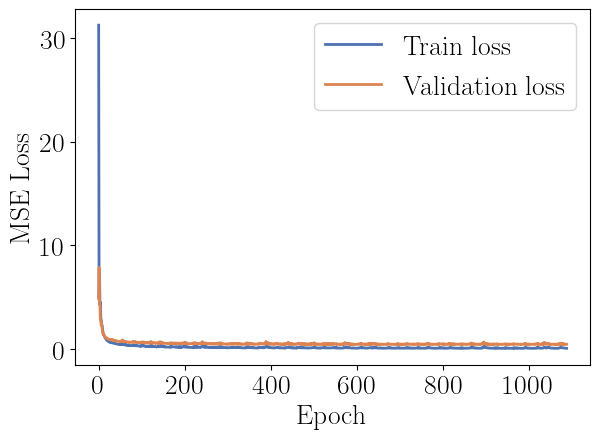

In [3]:
trainer.train()
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train Loss: 0.0866, R2: 0.9494
Validation Loss: 0.4186, R2: 0.7449
Test Loss: 0.3765, R2: 0.7290


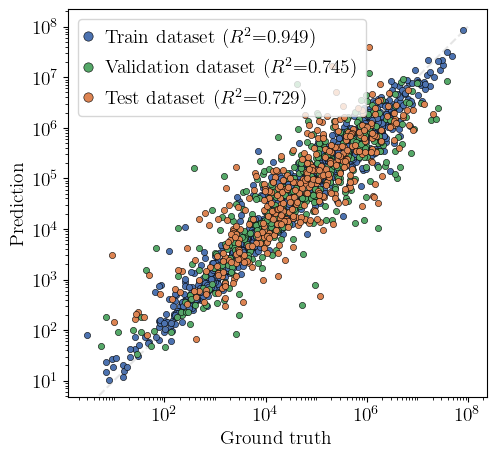

In [4]:
trainer.plot_truth_pred()

Train Loss: 0.0633, R2: 0.9630
Validation Loss: 0.4922, R2: 0.7001
Test Loss: 0.4160, R2: 0.7005


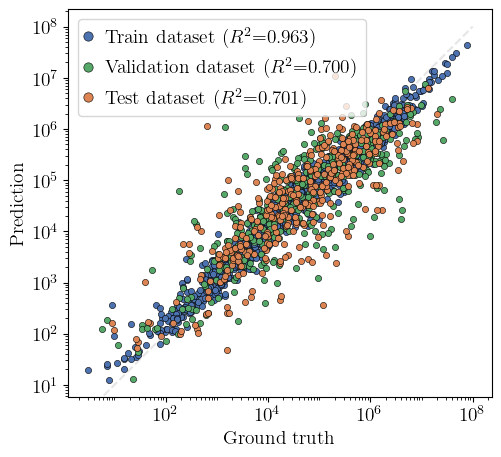

In [5]:
trainer.plot_truth_pred_sklearn(model_name='rf')

Device used : cpu
epoch 0  | loss: 30.2171 | val_0_mse: 666.3994|  0:00:00s
epoch 100| loss: 0.46135 | val_0_mse: 0.78709 |  0:00:03s
epoch 200| loss: 0.40406 | val_0_mse: 0.55302 |  0:00:07s
epoch 300| loss: 0.35565 | val_0_mse: 0.45563 |  0:00:11s
epoch 400| loss: 0.3396  | val_0_mse: 0.51506 |  0:00:15s
epoch 500| loss: 0.31064 | val_0_mse: 0.46873 |  0:00:19s
epoch 600| loss: 0.29969 | val_0_mse: 0.50105 |  0:00:22s
epoch 700| loss: 0.30252 | val_0_mse: 0.48746 |  0:00:26s
epoch 800| loss: 0.25317 | val_0_mse: 0.44928 |  0:00:29s
epoch 900| loss: 0.26407 | val_0_mse: 0.454   |  0:00:33s
epoch 1000| loss: 0.22253 | val_0_mse: 0.4681  |  0:00:37s
epoch 1100| loss: 0.23808 | val_0_mse: 0.46339 |  0:00:40s
epoch 1200| loss: 0.22687 | val_0_mse: 0.51545 |  0:00:44s
epoch 1300| loss: 0.2271  | val_0_mse: 0.49846 |  0:00:48s
epoch 1400| loss: 0.21412 | val_0_mse: 0.46742 |  0:00:52s
epoch 1500| loss: 0.21201 | val_0_mse: 0.49575 |  0:00:56s

Early stopping occured at epoch 1541 with best_

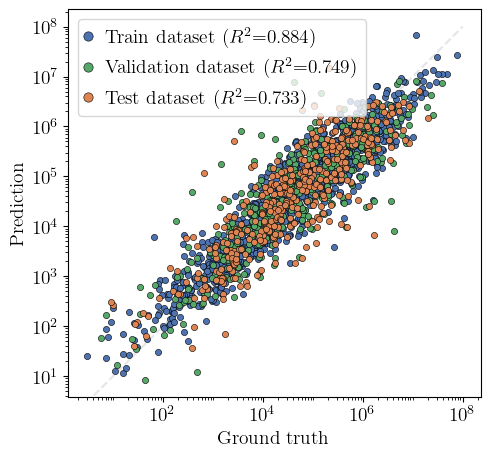

In [11]:
trainer.plot_truth_pred_sklearn(model_name='tabnet')

### Permutation feature importance

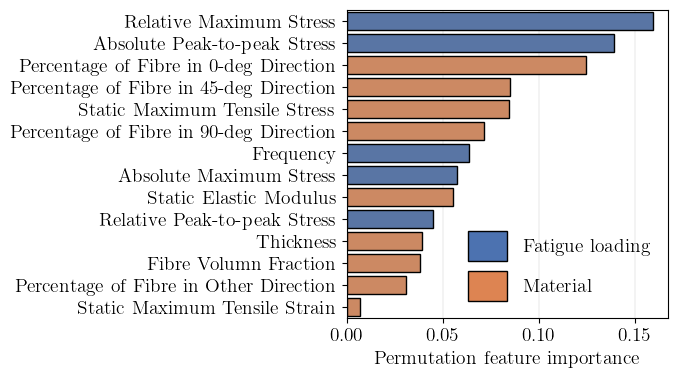

In [6]:
trainer.plot_feature_importance()

### Partial dependence

Calculate PDP:  Percentage of Fibre in 0-deg Direction
Calculate PDP:  Percentage of Fibre in 45-deg Direction
Calculate PDP:  Percentage of Fibre in 90-deg Direction
Calculate PDP:  Percentage of Fibre in Other Direction
Calculate PDP:  Absolute Maximum Stress
Calculate PDP:  Absolute Peak-to-peak Stress
Calculate PDP:  Frequency
Calculate PDP:  Fibre Volumn Fraction
Calculate PDP:  Relative Maximum Stress
Calculate PDP:  Relative Peak-to-peak Stress
Calculate PDP:  Thickness
Calculate PDP:  Static Maximum Tensile Stress
Calculate PDP:  Static Maximum Tensile Strain
Calculate PDP:  Static Elastic Modulus


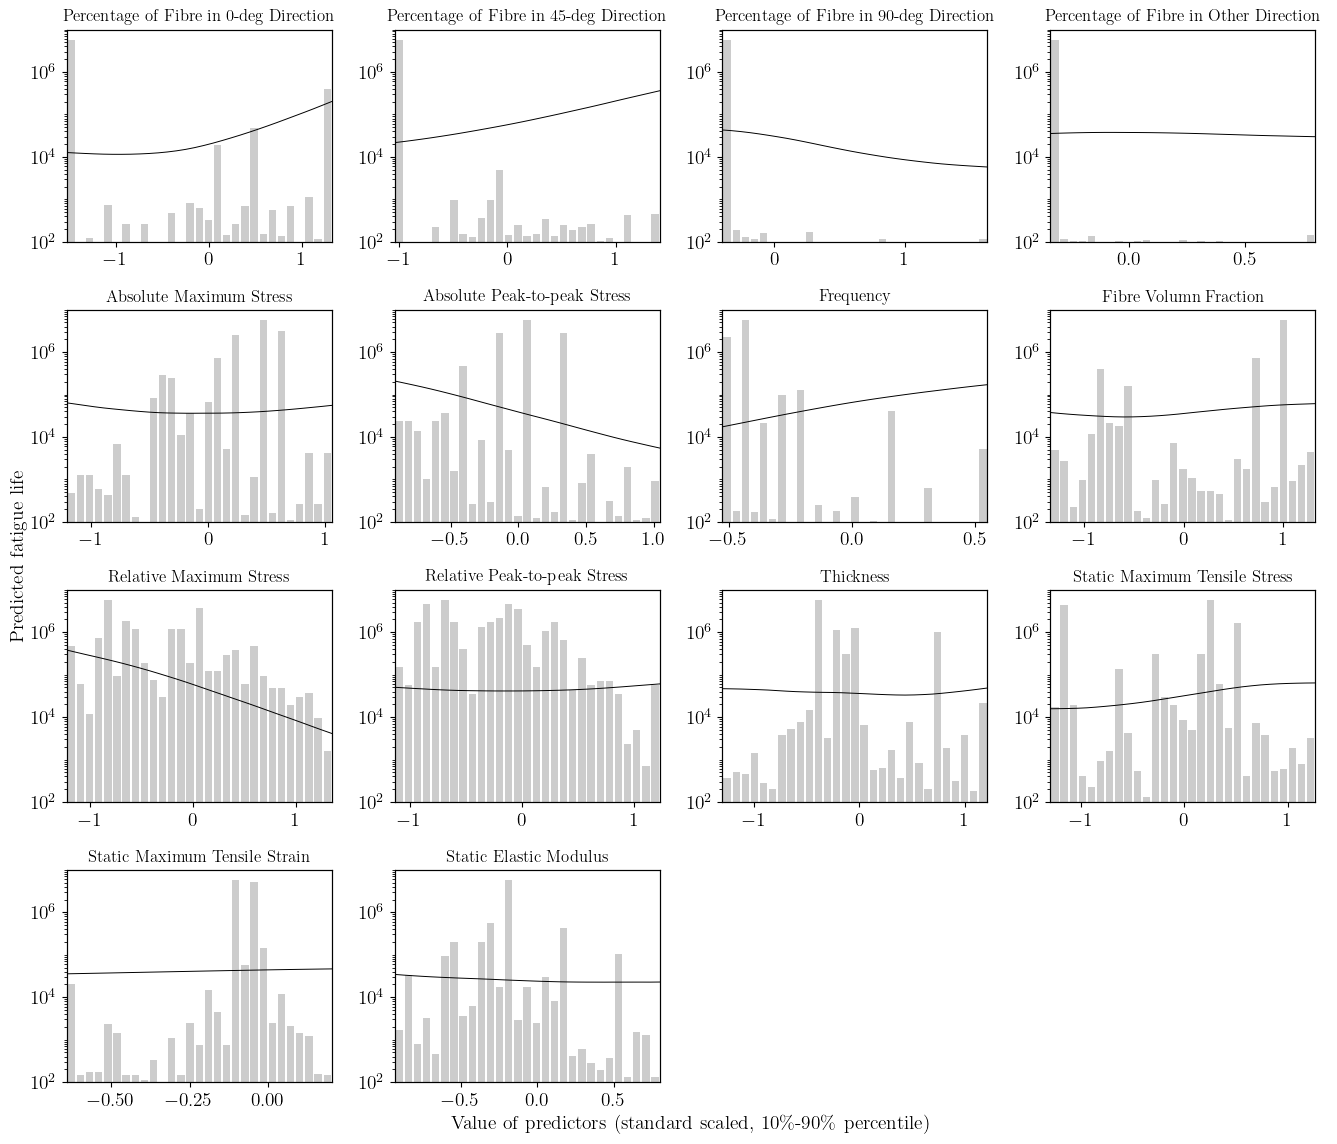

In [7]:
trainer.plot_partial_dependence()

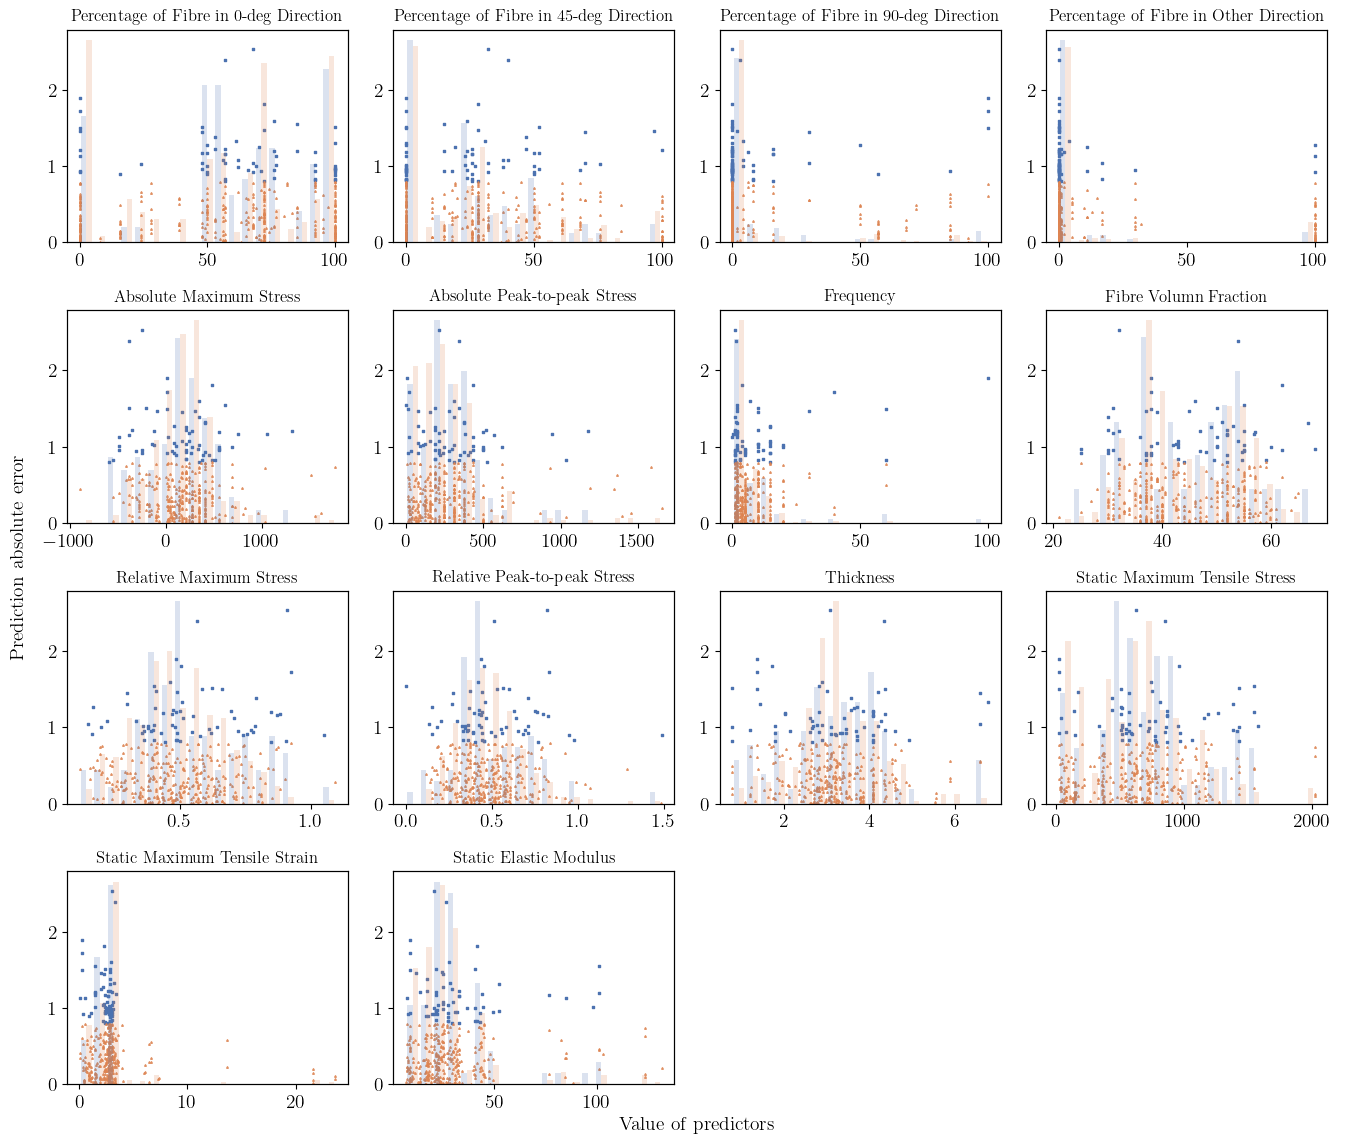

In [8]:
trainer.plot_partial_err()

In [9]:
trainer.autogluon_tests(verbose=False, debug_mode=True)


-------------Run AutoGluon Tests-------------



                  model  score_test  score_val  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost   -0.531311  -0.596848        0.002075       0.001631  1.287233                 0.002075                0.001631           1.287233            1       True          6
1   WeightedEnsemble_L2   -0.539872  -0.555752        0.140086       0.161787  1.976108                 0.007342                0.000238           0.175987            2       True         12
2            LightGBMXT   -0.545297  -0.557469        0.011249       0.046487  0.842237                 0.011249                0.046487           0.842237            1       True          3
3               XGBoost   -0.558630  -0.667119        0.047578       0.019096  0.745964                 0.047578                0.019096           0.745964            1       True          9
4              LightGBM   -0.580483  -0.63629

In [11]:
trainer.pytorch_tabular_tests(verbose=False, debug_mode=True)


-------------Run Pytorch-tabular Tests-------------

Training CategoryEmbeddingModel
Training NODEModel
Training TabNetModel
Training TabTransformerModel
Training AutoIntModel

-------------Pytorch-tabular Tests End-------------



In [15]:
trainer.pytorch_tabular_leaderboard

,model,mse,rmse
4,AutoIntModel,0.660225,0.812542
3,TabTransformerModel,0.929963,0.964346
0,CategoryEmbeddingModel,5.093480,2.256874
2,TabNetModel,5.424803,2.329121
1,NODEModel,19.882633,4.458995


In [ ]:
trainer.get_leaderboard(test_data_only=False)

In [12]:
trainer.plot_truth_pred_baseline(program='pytorch_tabular')

Making baseline predictions...
AutoIntModel 1/5
TabTransformerModel 2/5
CategoryEmbeddingModel 3/5
TabNetModel 4/5
NODEModel 5/5
Plotting...
AutoIntModel 1/5
Train Loss: 0.6529, R2: 0.6183
Validation Loss: 0.7530, R2: 0.5412
Test Loss: 0.6602, R2: 0.5248
TabTransformerModel 2/5
Train Loss: 0.8322, R2: 0.5135
Validation Loss: 1.0157, R2: 0.3810
Test Loss: 0.9300, R2: 0.3306
CategoryEmbeddingModel 3/5
Train Loss: 5.0787, R2: -1.9688
Validation Loss: 5.1767, R2: -2.1546
Test Loss: 5.0935, R2: -2.6663
TabNetModel 4/5
Train Loss: 5.8782, R2: -2.4361
Validation Loss: 5.8995, R2: -2.5951
Test Loss: 5.4248, R2: -2.9048
NODEModel 5/5
Train Loss: 20.3011, R2: -10.8669
Validation Loss: 20.1721, R2: -11.2926
Test Loss: 19.8826, R2: -13.3115


In [13]:
trainer.plot_truth_pred_baseline(program='autogluon')

Making baseline predictions...
CatBoost 1/12
WeightedEnsemble_L2 2/12
LightGBMXT 3/12
XGBoost 4/12
LightGBM 5/12
LightGBMLarge 6/12
ExtraTreesMSE 7/12
RandomForestMSE 8/12
NeuralNetFastAI 9/12
NeuralNetMXNet 10/12
KNeighborsDist 11/12
KNeighborsUnif 12/12
Plotting...
CatBoost 1/12
Train Loss: 0.0866, R2: 0.9489
Test Loss: 0.2823, R2: 0.7968
WeightedEnsemble_L2 2/12
Train Loss: 0.1171, R2: 0.9308
Test Loss: 0.2915, R2: 0.7902
LightGBMXT 3/12
Train Loss: 0.1190, R2: 0.9297
Test Loss: 0.2973, R2: 0.7860
XGBoost 4/12
Train Loss: 0.0978, R2: 0.9422
Test Loss: 0.3121, R2: 0.7754
LightGBM 5/12
Train Loss: 0.1354, R2: 0.9200
Test Loss: 0.3370, R2: 0.7575
LightGBMLarge 6/12
Train Loss: 0.1060, R2: 0.9374
Test Loss: 0.3438, R2: 0.7525
ExtraTreesMSE 7/12
Train Loss: 0.1301, R2: 0.9231
Test Loss: 0.3519, R2: 0.7467
RandomForestMSE 8/12
Train Loss: 0.1461, R2: 0.9137
Test Loss: 0.3614, R2: 0.7399
NeuralNetFastAI 9/12
Train Loss: 0.3080, R2: 0.8181
Test Loss: 0.4004, R2: 0.7118
NeuralNetMXNet 10/12
